In [4]:
import numpy as np 
import pandas as pd

In [5]:
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [13]:
pop[("New York", 2000)]

18976457

In [168]:
pop[('California', 2010):('Texas', 2000)]


(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [169]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [170]:
index = pd.MultiIndex.from_tuples(index)
index


MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [171]:
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [172]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [173]:
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [174]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [175]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Multindex constructor


In [176]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [177]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [178]:
stocks =pd.read_csv ("http://bit.ly/smallstocks")
stocks 

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [179]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [180]:
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [181]:
stocks.index.names

FrozenList([None])

In [182]:
stocks.index
stocks.groupby("Symbol").Close.mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [183]:
ser =stocks.groupby(["Symbol", "Date"]).Close.mean()
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [184]:
ser.index

MultiIndex([('AAPL', '2016-10-03'),
            ('AAPL', '2016-10-04'),
            ('AAPL', '2016-10-05'),
            ('CSCO', '2016-10-03'),
            ('CSCO', '2016-10-04'),
            ('CSCO', '2016-10-05'),
            ('MSFT', '2016-10-03'),
            ('MSFT', '2016-10-04'),
            ('MSFT', '2016-10-05')],
           names=['Symbol', 'Date'])

In [185]:
ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [186]:
stocks.pivot_table(values = "Close", index = "Symbol", columns = "Date")

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [187]:
ser.loc['AAPL',"2016-10-03"]
ser.loc[:,"2016-10-03"]

Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: Close, dtype: float64

In [188]:
stocks 

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [189]:
stocks.set_index(['Symbol', 'Date'], inplace = True)
stocks.sort_index(inplace=True)


In [190]:
stocks.loc['AAPL']

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [191]:
stocks.loc[('AAPL', '2016-10-03'), :]

Close          112.52
Volume    21701800.00
Name: (AAPL, 2016-10-03), dtype: float64

In [192]:
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [193]:
stocks.loc[(('AAPL', 'MSFT')), '2016-10-03', :]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500


In [194]:
wareh= pd.read_csv(r"C:\Users\HP Demo\OneDrive - Stellenbosch University\Desktop\Python\Python\Warehouses.csv", index_col=[0,1,2], header = [0,1] )

In [195]:
wareh.head(10)

2010            2011            2012  \
                                   Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
NY Warehouses Buffalo       Mobile      26      12      10      23      18   
                            TV          19      22      27      19      27   
                            AC          16      24      20      23      29   
              Ithaca        Mobile      10      28      27      22      18   
                            TV          13      13      11      15      12   
                            AC          18      17      19      28      28   
              Beacon        Mobile      10      17      24      27      25   
                            TV          12      22      26      26      15   
                            AC          13      11      23      13      20   
CA Warehouses San Francisco Mobile      15      25      18      16      13   

                                              2013            2014          \
                                   Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
NY Warehouses Buffalo       Mobile      10      10      26      16      18   
                            TV          12      24      28      27      28   
                            AC          15      10      20      16      16   
              Ithaca        Mobile      14      22      12      14      16   
                            TV          15      27      17      10      25   
                            AC          14      21      18      25      17   
              Beacon        Mobile      11      22      26      10      13   
                            TV          28      15      26      12      18   
                            AC          26      10      12      14      10   
CA Warehouses San Francisco Mobile      13      19      15      21      23   

                                      2015            2016            2017  \
                                   Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
NY Warehouses Buffalo       Mobile      20      21      20      26      29   
                            TV          10      16      25      26      20   
                            AC          25      21      19      12      21   
              Ithaca        Mobile      21      13      27      17      15   
                            TV          20      27      17      16      13   
                            AC          18      27      23      24      22   
              Beacon        Mobile      25      13      29      23      28   
                            TV          17      10      21      19      24   
                            AC          28      26      21      26      29   
CA Warehouses San Francisco Mobile      11      26      27      16      16   

                                              2018            2019          
                                   Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec  
NY Warehouses Buffalo       Mobile      20      11      21      25      16  
                            TV          25      10      27      20      20  
                            AC          19      11      28      19      19  
              Ithaca        Mobile      19      21      15      29      14  
                            TV          23      15      26      15      28  
                            AC          12      11      12      19      22  
              Beacon        Mobile      22      22      26      20      18  
                            TV          23      26      19      19      13  
                            AC          12      29      18      20      24  
CA Warehouses San Francisco Mobile      18      29      22      25      20

In [196]:
wareh.sort_index(inplace = True)

In [197]:
wareh.head(20)

2010            2011            2012  \
                                   Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
CA Warehouses Los Angeles   AC          27      24      20      21      20   
                            Mobile      29      15      14      28      29   
                            TV          23      14      18      21      10   
              San Diego     AC          11      22      10      29      24   
                            Mobile      14      27      24      16      23   
                            TV          19      24      17      17      11   
              San Francisco AC          10      14      10      16      17   
                            Mobile      15      25      18      16      13   
                            TV          28      16      15      29      28   
NY Warehouses Beacon        AC          13      11      23      13      20   
                            Mobile      10      17      24      27      25   
                            TV          12      22      26      26      15   
              Buffalo       AC          16      24      20      23      29   
                            Mobile      26      12      10      23      18   
                            TV          19      22      27      19      27   
              Ithaca        AC          18      17      19      28      28   
                            Mobile      10      28      27      22      18   
                            TV          13      13      11      15      12   
TX Warehouses Arlington     AC          21      18      13      22      16   
                            Mobile      29      10      12      13      13   

                                              2013            2014          \
                                   Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
CA Warehouses Los Angeles   AC          29      18      29      15      17   
                            Mobile      27      18      27      16      29   
                            TV          15      11      19      25      11   
              San Diego     AC          24      24      11      18      27   
                            Mobile      20      11      23      29      16   
                            TV          12      22      21      18      29   
              San Francisco AC          20      28      25      27      11   
                            Mobile      13      19      15      21      23   
                            TV          27      27      14      12      20   
NY Warehouses Beacon        AC          26      10      12      14      10   
                            Mobile      11      22      26      10      13   
                            TV          28      15      26      12      18   
              Buffalo       AC          15      10      20      16      16   
                            Mobile      10      10      26      16      18   
                            TV          12      24      28      27      28   
              Ithaca        AC          14      21      18      25      17   
                            Mobile      14      22      12      14      16   
                            TV          15      27      17      10      25   
TX Warehouses Arlington     AC          18      21      22      22      11   
                            Mobile      25      10      19      10      16   

                                      2015            2016            2017  \
                                   Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
CA Warehouses Los Angeles   AC          27      25      12      23      23   
                            Mobile      10      15      20      17      11   
                            TV          12      11      23      20      22   
              San Diego     AC          29      10      16      28      12   
                            Mobile      18      14      15      16      24   
                            TV          22      19      13

In [198]:
wareh.index.names= [ "State", "City", "Product"]

In [199]:
wareh.head()

2010            2011            2012  \
                                  Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City        Product                                           
CA Warehouses Los Angeles AC           27      24      20      21      20   
                          Mobile       29      15      14      28      29   
                          TV           23      14      18      21      10   
              San Diego   AC           11      22      10      29      24   
                          Mobile       14      27      24      16      23   

                                             2013            2014          \
                                  Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City        Product                                           
CA Warehouses Los Angeles AC           29      18      29      15      17   
                          Mobile       27      18      27      16      29   
                          TV           15      11      19      25      11   
              San Diego   AC           24      24      11      18      27   
                          Mobile       20      11      23      29      16   

                                     2015            2016            2017  \
                                  Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City        Product                                           
CA Warehouses Los Angeles AC           27      25      12      23      23   
                          Mobile       10      15      20      17      11   
                          TV           12      11      23      20      22   
              San Diego   AC           29      10      16      28      12   
                          Mobile       18      14      15      16      24   

                                             2018            2019          
                                  Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec  
State         City        Product                                          
CA Warehouses Los Angeles AC           14      29      25      25      16  
                          Mobile       14      25      11      29      19  
                          TV           21      21      17      15      10  
              San Diego   AC           19      10      15      20      15  
                          Mobile       13      15      24      12      13

In [200]:
wareh.columns.names

FrozenList([None, None])

In [201]:
wareh.columns.names= ["Year", "Semester"]

In [202]:
wareh.head()
wareh.columns

MultiIndex([('2010', 'Jan-Jun'),
            ('2010', 'Jul-Dec'),
            ('2011', 'Jan-Jun'),
            ('2011', 'Jul-Dec'),
            ('2012', 'Jan-Jun'),
            ('2012', 'Jul-Dec'),
            ('2013', 'Jan-Jun'),
            ('2013', 'Jul-Dec'),
            ('2014', 'Jan-Jun'),
            ('2014', 'Jul-Dec'),
            ('2015', 'Jan-Jun'),
            ('2015', 'Jul-Dec'),
            ('2016', 'Jan-Jun'),
            ('2016', 'Jul-Dec'),
            ('2017', 'Jan-Jun'),
            ('2017', 'Jul-Dec'),
            ('2018', 'Jan-Jun'),
            ('2018', 'Jul-Dec'),
            ('2019', 'Jan-Jun'),
            ('2019', 'Jul-Dec')],
           names=['Year', 'Semester'])

In [203]:
wareh.info()
wareh.shape

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27 entries, ('CA Warehouses', 'Los Angeles', 'AC') to ('TX Warehouses', 'Houston', 'TV')
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   (2010, Jan-Jun)  27 non-null     int64
 1   (2010, Jul-Dec)  27 non-null     int64
 2   (2011, Jan-Jun)  27 non-null     int64
 3   (2011, Jul-Dec)  27 non-null     int64
 4   (2012, Jan-Jun)  27 non-null     int64
 5   (2012, Jul-Dec)  27 non-null     int64
 6   (2013, Jan-Jun)  27 non-null     int64
 7   (2013, Jul-Dec)  27 non-null     int64
 8   (2014, Jan-Jun)  27 non-null     int64
 9   (2014, Jul-Dec)  27 non-null     int64
 10  (2015, Jan-Jun)  27 non-null     int64
 11  (2015, Jul-Dec)  27 non-null     int64
 12  (2016, Jan-Jun)  27 non-null     int64
 13  (2016, Jul-Dec)  27 non-null     int64
 14  (2017, Jan-Jun)  27 non-null     int64
 15  (2017, Jul-Dec)  27 non-null     int64
 16  (2018, Jan-Jun)  27 non-null   

(27, 20)

In [204]:
wareh.head(27)

Year                                   2010            2011            2012  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      24      20      21      20   
                            Mobile       29      15      14      28      29   
                            TV           23      14      18      21      10   
              San Diego     AC           11      22      10      29      24   
                            Mobile       14      27      24      16      23   
                            TV           19      24      17      17      11   
              San Francisco AC           10      14      10      16      17   
                            Mobile       15      25      18      16      13   
                            TV           28      16      15      29      28   
NY Warehouses Beacon        AC           13      11      23      13      20   
                            Mobile       10      17      24      27      25   
                            TV           12      22      26      26      15   
              Buffalo       AC           16      24      20      23      29   
                            Mobile       26      12      10      23      18   
                            TV           19      22      27      19      27   
              Ithaca        AC           18      17      19      28      28   
                            Mobile       10      28      27      22      18   
                            TV           13      13      11      15      12   
TX Warehouses Arlington     AC           21      18      13      22      16   
                            Mobile       29      10      12      13      13   
                            TV           15      20      22      25      23   
              Austin        AC           15      28      28      11      11   
                            Mobile       17      11      29      25      20   
                            TV           27      11      14      11      23   
              Houston       AC           12      25      18      12      26   
                            Mobile       27      17      16      18      21   
                            TV           11      18      22      21      26   

Year                                           2013            2014          \
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City          Product                                           
CA Warehouses Los Angeles   AC           29      18      29      15      17   
                            Mobile       27      18      27      16      29   
                            TV           15      11      19      25      11   
              San Diego     AC           24      24      11      18      27   
                            Mobile       20      11      23      29      16   
                            TV           12      22      21      18      29   
              San Francisco AC           20      28      25      27      11   
                            Mobile       13      19      15      21      23   
                            TV           27      27      14      12      20   
NY Warehouses Beacon        AC           26      10      12      14      10   
                            Mobile       11      22      26      10      13   
                            TV           28      15      26      12      18   
              Buffalo       AC           15      10      20      16      16   
                            Mobile       10      10      26      16      18   
                            TV           12      24      28      27      28   
              Ithaca        AC           14      21      18      25      17   
                            Mobile       14      22      12      14      16   
                            TV           15      

In [205]:
wareh.columns.levels[0].astype (int)

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='Year')

In [206]:
wareh.columns.set_levels(levels=wareh.columns.levels[0].astype (int), level=0, inplace =True)

C:\Users\HP Demo\AppData\Local\Temp\ipykernel_272\3818855827.py:1: FutureWarning: inplace is deprecated and will be removed in a future version.
  wareh.columns.set_levels(levels=wareh.columns.levels[0].astype (int), level=0, inplace =True)


In [207]:
#wareh.loc[(ROW),(COLUMN)]
wareh.loc[("CA Warehouses", "San Diego", "Mobile"),(2010,"Jul-Dec")]

27

In [208]:
wareh. head(27)

Year                                   2010            2011            2012  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      24      20      21      20   
                            Mobile       29      15      14      28      29   
                            TV           23      14      18      21      10   
              San Diego     AC           11      22      10      29      24   
                            Mobile       14      27      24      16      23   
                            TV           19      24      17      17      11   
              San Francisco AC           10      14      10      16      17   
                            Mobile       15      25      18      16      13   
                            TV           28      16      15      29      28   
NY Warehouses Beacon        AC           13      11      23      13      20   
                            Mobile       10      17      24      27      25   
                            TV           12      22      26      26      15   
              Buffalo       AC           16      24      20      23      29   
                            Mobile       26      12      10      23      18   
                            TV           19      22      27      19      27   
              Ithaca        AC           18      17      19      28      28   
                            Mobile       10      28      27      22      18   
                            TV           13      13      11      15      12   
TX Warehouses Arlington     AC           21      18      13      22      16   
                            Mobile       29      10      12      13      13   
                            TV           15      20      22      25      23   
              Austin        AC           15      28      28      11      11   
                            Mobile       17      11      29      25      20   
                            TV           27      11      14      11      23   
              Houston       AC           12      25      18      12      26   
                            Mobile       27      17      16      18      21   
                            TV           11      18      22      21      26   

Year                                           2013            2014          \
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City          Product                                           
CA Warehouses Los Angeles   AC           29      18      29      15      17   
                            Mobile       27      18      27      16      29   
                            TV           15      11      19      25      11   
              San Diego     AC           24      24      11      18      27   
                            Mobile       20      11      23      29      16   
                            TV           12      22      21      18      29   
              San Francisco AC           20      28      25      27      11   
                            Mobile       13      19      15      21      23   
                            TV           27      27      14      12      20   
NY Warehouses Beacon        AC           26      10      12      14      10   
                            Mobile       11      22      26      10      13   
                            TV           28      15      26      12      18   
              Buffalo       AC           15      10      20      16      16   
                            Mobile       10      10      26      16      18   
                            TV           12      24      28      27      28   
              Ithaca        AC           14      21      18      25      17   
                            Mobile       14      22      12      14      16   
                            TV           15      

In [209]:
Tx =wareh.loc[("CA Warehouses", "San Francisco", "AC"):("NY Warehouses", "Ithaca","Mobile"), (2012, "Jul-Dec"):(2013,"Jan-Jun")]
Tx

Year                                   2012    2013
Semester                            Jul-Dec Jan-Jun
State         City          Product                
CA Warehouses San Francisco AC           20      28
                            Mobile       13      19
                            TV           27      27
NY Warehouses Beacon        AC           26      10
                            Mobile       11      22
                            TV           28      15
              Buffalo       AC           15      10
                            Mobile       10      10
                            TV           12      24
              Ithaca        AC           14      21
                            Mobile       14      22

In [210]:
wareh[(2011, "Jan-Jun")]

State          City           Product
CA Warehouses  Los Angeles    AC         20
                              Mobile     14
                              TV         18
               San Diego      AC         10
                              Mobile     24
                              TV         17
               San Francisco  AC         10
                              Mobile     18
                              TV         15
NY Warehouses  Beacon         AC         23
                              Mobile     24
                              TV         26
               Buffalo        AC         20
                              Mobile     10
                              TV         27
               Ithaca         AC         19
                              Mobile     27
                              TV         11
TX Warehouses  Arlington      AC         13
                              Mobile     12
                              TV         22
               Austin         AC      

In [211]:
wareh.loc["NY Warehouses":"TX Warehouses", :]

Year                               2010            2011            2012  \
Semester                        Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City      Product                                           
NY Warehouses Beacon    AC           13      11      23      13      20   
                        Mobile       10      17      24      27      25   
                        TV           12      22      26      26      15   
              Buffalo   AC           16      24      20      23      29   
                        Mobile       26      12      10      23      18   
                        TV           19      22      27      19      27   
              Ithaca    AC           18      17      19      28      28   
                        Mobile       10      28      27      22      18   
                        TV           13      13      11      15      12   
TX Warehouses Arlington AC           21      18      13      22      16   
                        Mobile       29      10      12      13      13   
                        TV           15      20      22      25      23   
              Austin    AC           15      28      28      11      11   
                        Mobile       17      11      29      25      20   
                        TV           27      11      14      11      23   
              Houston   AC           12      25      18      12      26   
                        Mobile       27      17      16      18      21   
                        TV           11      18      22      21      26   

Year                                       2013            2014          \
Semester                        Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City      Product                                           
NY Warehouses Beacon    AC           26      10      12      14      10   
                        Mobile       11      22      26      10      13   
                        TV           28      15      26      12      18   
              Buffalo   AC           15      10      20      16      16   
                        Mobile       10      10      26      16      18   
                        TV           12      24      28      27      28   
              Ithaca    AC           14      21      18      25      17   
                        Mobile       14      22      12      14      16   
                        TV           15      27      17      10      25   
TX Warehouses Arlington AC           18      21      22      22      11   
                        Mobile       25      10      19      10      16   
                        TV           20      23      21      13      26   
              Austin    AC           12      15      25      29      16   
                        Mobile       26      19      20      21      17   
                        TV           22      27      10      28      29   
              Houston   AC           23      21      12      22      29   
                        Mobile       21      15      16      23      25   
                        TV           18      18      12      15      26   

Year                               2015            2016            2017  \
Semester                        Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City      Product                                           
NY Warehouses Beacon    AC           28      26      21      26      29   
                        Mobile       25      13      29      23      28   
                        TV           17      10      21      19      24   
              Buffalo   AC           25      21      19      12      21   
                        Mobile       20      21      20      26      29   
                        TV           10      16      25      26      20   
              Ithaca    AC           18      27      23      24      22   
                        Mobile       21      13      27      17      15   
                       

XS method - crosssection method

In [212]:
wareh.xs ("AC", level = "Product", drop_level = False)

Year                                   2010            2011            2012  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      24      20      21      20   
              San Diego     AC           11      22      10      29      24   
              San Francisco AC           10      14      10      16      17   
NY Warehouses Beacon        AC           13      11      23      13      20   
              Buffalo       AC           16      24      20      23      29   
              Ithaca        AC           18      17      19      28      28   
TX Warehouses Arlington     AC           21      18      13      22      16   
              Austin        AC           15      28      28      11      11   
              Houston       AC           12      25      18      12      26   

Year                                           2013            2014          \
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City          Product                                           
CA Warehouses Los Angeles   AC           29      18      29      15      17   
              San Diego     AC           24      24      11      18      27   
              San Francisco AC           20      28      25      27      11   
NY Warehouses Beacon        AC           26      10      12      14      10   
              Buffalo       AC           15      10      20      16      16   
              Ithaca        AC           14      21      18      25      17   
TX Warehouses Arlington     AC           18      21      22      22      11   
              Austin        AC           12      15      25      29      16   
              Houston       AC           23      21      12      22      29   

Year                                   2015            2016            2017  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      25      12      23      23   
              San Diego     AC           29      10      16      28      12   
              San Francisco AC           19      18      22      13      16   
NY Warehouses Beacon        AC           28      26      21      26      29   
              Buffalo       AC           25      21      19      12      21   
              Ithaca        AC           18      27      23      24      22   
TX Warehouses Arlington     AC           28      13      17      10      29   
              Austin        AC           20      16      20      14      14   
              Houston       AC           25      15      21      26      21   

Year                                           2018            2019          
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec  
State         City          Product                                          
CA Warehouses Los Angeles   AC           14      29      25      25      16  
              San Diego     AC           19      10      15      20      15  
              San Francisco AC           13      21      16      15      23  
NY Warehouses Beacon        AC           12      29      18      20      24  
              Buffalo       AC           19      11      28      19      19  
              Ithaca        AC           12      11      12      19      22  
TX Warehouses Arlington     AC           15      15      22      19      11  
              Austin        AC           13      26      27      21      16  
              Houston       AC           26      28      23      29      19

In [213]:
wareh.xs(("CA Warehouses", "AC"),level= ("State", "Product"), drop_level = False).sum().sum()

1167

In [214]:
wareh.xs(("TX Warehouses", "AC"),level= ("State", "Product"), drop_level = False).sum().sum()

1173

In [215]:
wareh.xs(("NY Warehouses", "AC"),level= ("State", "Product"), drop_level = False).sum().sum()

1163

In [216]:
wareh.xs("San Diego", level = "City", drop_level = False)

Year                               2010            2011            2012  \
Semester                        Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City      Product                                           
CA Warehouses San Diego AC           11      22      10      29      24   
                        Mobile       14      27      24      16      23   
                        TV           19      24      17      17      11   

Year                                       2013            2014          \
Semester                        Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City      Product                                           
CA Warehouses San Diego AC           24      24      11      18      27   
                        Mobile       20      11      23      29      16   
                        TV           12      22      21      18      29   

Year                               2015            2016            2017  \
Semester                        Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City      Product                                           
CA Warehouses San Diego AC           29      10      16      28      12   
                        Mobile       18      14      15      16      24   
                        TV           22      19      13      28      18   

Year                                       2018            2019          
Semester                        Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec  
State         City      Product                                          
CA Warehouses San Diego AC           19      10      15      20      15  
                        Mobile       13      15      24      12      13  
                        TV           29      10      19      22      17

Take method 



In [217]:
wareh.take([0,3,6,9, 12, 15])

Year                                   2010            2011            2012  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      24      20      21      20   
              San Diego     AC           11      22      10      29      24   
              San Francisco AC           10      14      10      16      17   
NY Warehouses Beacon        AC           13      11      23      13      20   
              Buffalo       AC           16      24      20      23      29   
              Ithaca        AC           18      17      19      28      28   

Year                                           2013            2014          \
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City          Product                                           
CA Warehouses Los Angeles   AC           29      18      29      15      17   
              San Diego     AC           24      24      11      18      27   
              San Francisco AC           20      28      25      27      11   
NY Warehouses Beacon        AC           26      10      12      14      10   
              Buffalo       AC           15      10      20      16      16   
              Ithaca        AC           14      21      18      25      17   

Year                                   2015            2016            2017  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      25      12      23      23   
              San Diego     AC           29      10      16      28      12   
              San Francisco AC           19      18      22      13      16   
NY Warehouses Beacon        AC           28      26      21      26      29   
              Buffalo       AC           25      21      19      12      21   
              Ithaca        AC           18      27      23      24      22   

Year                                           2018            2019          
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec  
State         City          Product                                          
CA Warehouses Los Angeles   AC           14      29      25      25      16  
              San Diego     AC           19      10      15      20      15  
              San Francisco AC           13      21      16      15      23  
NY Warehouses Beacon        AC           12      29      18      20      24  
              Buffalo       AC           19      11      28      19      19  
              Ithaca        AC           12      11      12      19      22

In [218]:
wareh.take([0,1,2,3], axis = 1)

Year                                   2010            2011        
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec
State         City          Product                                
CA Warehouses Los Angeles   AC           27      24      20      21
                            Mobile       29      15      14      28
                            TV           23      14      18      21
              San Diego     AC           11      22      10      29
                            Mobile       14      27      24      16
                            TV           19      24      17      17
              San Francisco AC           10      14      10      16
                            Mobile       15      25      18      16
                            TV           28      16      15      29
NY Warehouses Beacon        AC           13      11      23      13
                            Mobile       10      17      24      27
                            TV           12      22      26      26
              Buffalo       AC           16      24      20      23
                            Mobile       26      12      10      23
                            TV           19      22      27      19
              Ithaca        AC           18      17      19      28
                            Mobile       10      28      27      22
                            TV           13      13      11      15
TX Warehouses Arlington     AC           21      18      13      22
                            Mobile       29      10      12      13
                            TV           15      20      22      25
              Austin        AC           15      28      28      11
                            Mobile       17      11      29      25
                            TV           27      11      14      11
              Houston       AC           12      25      18      12
                            Mobile       27      17      16      18
                            TV           11      18      22      21

Slice ()

In [219]:
wareh

Year                                   2010            2011            2012  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      24      20      21      20   
                            Mobile       29      15      14      28      29   
                            TV           23      14      18      21      10   
              San Diego     AC           11      22      10      29      24   
                            Mobile       14      27      24      16      23   
                            TV           19      24      17      17      11   
              San Francisco AC           10      14      10      16      17   
                            Mobile       15      25      18      16      13   
                            TV           28      16      15      29      28   
NY Warehouses Beacon        AC           13      11      23      13      20   
                            Mobile       10      17      24      27      25   
                            TV           12      22      26      26      15   
              Buffalo       AC           16      24      20      23      29   
                            Mobile       26      12      10      23      18   
                            TV           19      22      27      19      27   
              Ithaca        AC           18      17      19      28      28   
                            Mobile       10      28      27      22      18   
                            TV           13      13      11      15      12   
TX Warehouses Arlington     AC           21      18      13      22      16   
                            Mobile       29      10      12      13      13   
                            TV           15      20      22      25      23   
              Austin        AC           15      28      28      11      11   
                            Mobile       17      11      29      25      20   
                            TV           27      11      14      11      23   
              Houston       AC           12      25      18      12      26   
                            Mobile       27      17      16      18      21   
                            TV           11      18      22      21      26   

Year                                           2013            2014          \
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City          Product                                           
CA Warehouses Los Angeles   AC           29      18      29      15      17   
                            Mobile       27      18      27      16      29   
                            TV           15      11      19      25      11   
              San Diego     AC           24      24      11      18      27   
                            Mobile       20      11      23      29      16   
                            TV           12      22      21      18      29   
              San Francisco AC           20      28      25      27      11   
                            Mobile       13      19      15      21      23   
                            TV           27      27      14      12      20   
NY Warehouses Beacon        AC           26      10      12      14      10   
                            Mobile       11      22      26      10      13   
                            TV           28      15      26      12      18   
              Buffalo       AC           15      10      20      16      16   
                            Mobile       10      10      26      16      18   
                            TV           12      24      28      27      28   
              Ithaca        AC           14      21      18      25      17   
                            Mobile       14      22      12      14      16   
                            TV           15      

In [220]:
wareh.loc[(slice(None), slice (None), slice ("AC", "Mobile"))]

Year                                   2010            2011            2012  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      24      20      21      20   
                            Mobile       29      15      14      28      29   
              San Diego     AC           11      22      10      29      24   
                            Mobile       14      27      24      16      23   
              San Francisco AC           10      14      10      16      17   
                            Mobile       15      25      18      16      13   
NY Warehouses Beacon        AC           13      11      23      13      20   
                            Mobile       10      17      24      27      25   
              Buffalo       AC           16      24      20      23      29   
                            Mobile       26      12      10      23      18   
              Ithaca        AC           18      17      19      28      28   
                            Mobile       10      28      27      22      18   
TX Warehouses Arlington     AC           21      18      13      22      16   
                            Mobile       29      10      12      13      13   
              Austin        AC           15      28      28      11      11   
                            Mobile       17      11      29      25      20   
              Houston       AC           12      25      18      12      26   
                            Mobile       27      17      16      18      21   

Year                                           2013            2014          \
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City          Product                                           
CA Warehouses Los Angeles   AC           29      18      29      15      17   
                            Mobile       27      18      27      16      29   
              San Diego     AC           24      24      11      18      27   
                            Mobile       20      11      23      29      16   
              San Francisco AC           20      28      25      27      11   
                            Mobile       13      19      15      21      23   
NY Warehouses Beacon        AC           26      10      12      14      10   
                            Mobile       11      22      26      10      13   
              Buffalo       AC           15      10      20      16      16   
                            Mobile       10      10      26      16      18   
              Ithaca        AC           14      21      18      25      17   
                            Mobile       14      22      12      14      16   
TX Warehouses Arlington     AC           18      21      22      22      11   
                            Mobile       25      10      19      10      16   
              Austin        AC           12      15      25      29      16   
                            Mobile       26      19      20      21      17   
              Houston       AC           23      21      12      22      29   
                            Mobile       21      15      16      23      25   

Year                                   2015            2016            2017  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      25      12      23      23   
                            Mobile       10      15      20      17      11   
              San Diego     AC           29      10      16      28      12   
                            Mobile       18      14      15      16      24   
              San Francisco AC           19      18      22      13      16   
                            Mobile       11     

In [221]:
wareh.loc[(slice("CA Warehouses","NY Warehouses"), slice ("Beacon", 'Buffalo'), slice ("AC", "Mobile"))]

Year                             2010            2011            2012          \
Semester                      Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City    Product                                                   
NY Warehouses Beacon  AC           13      11      23      13      20      26   
                      Mobile       10      17      24      27      25      11   
              Buffalo AC           16      24      20      23      29      15   
                      Mobile       26      12      10      23      18      10   

Year                             2013            2014            2015          \
Semester                      Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City    Product                                                   
NY Warehouses Beacon  AC           10      12      14      10      28      26   
                      Mobile       22      26      10      13      25      13   
              Buffalo AC           10      20      16      16      25      21   
                      Mobile       10      26      16      18      20      21   

Year                             2016            2017            2018          \
Semester                      Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City    Product                                                   
NY Warehouses Beacon  AC           21      26      29      12      29      18   
                      Mobile       29      23      28      22      22      26   
              Buffalo AC           19      12      21      19      11      28   
                      Mobile       20      26      29      20      11      21   

Year                             2019          
Semester                      Jan-Jun Jul-Dec  
State         City    Product                  
NY Warehouses Beacon  AC           20      24  
                      Mobile       20      18  
              Buffalo AC           19      19  
                      Mobile       25      16

In [222]:
wareh.rename({'Mobile':'Laptops'}, axis = 0)

Year                                   2010            2011            2012  \
Semester                            Jan-Jun Jul-Dec Jan-Jun Jul-Dec Jan-Jun   
State         City          Product                                           
CA Warehouses Los Angeles   AC           27      24      20      21      20   
                            Laptops      29      15      14      28      29   
                            TV           23      14      18      21      10   
              San Diego     AC           11      22      10      29      24   
                            Laptops      14      27      24      16      23   
                            TV           19      24      17      17      11   
              San Francisco AC           10      14      10      16      17   
                            Laptops      15      25      18      16      13   
                            TV           28      16      15      29      28   
NY Warehouses Beacon        AC           13      11      23      13      20   
                            Laptops      10      17      24      27      25   
                            TV           12      22      26      26      15   
              Buffalo       AC           16      24      20      23      29   
                            Laptops      26      12      10      23      18   
                            TV           19      22      27      19      27   
              Ithaca        AC           18      17      19      28      28   
                            Laptops      10      28      27      22      18   
                            TV           13      13      11      15      12   
TX Warehouses Arlington     AC           21      18      13      22      16   
                            Laptops      29      10      12      13      13   
                            TV           15      20      22      25      23   
              Austin        AC           15      28      28      11      11   
                            Laptops      17      11      29      25      20   
                            TV           27      11      14      11      23   
              Houston       AC           12      25      18      12      26   
                            Laptops      27      17      16      18      21   
                            TV           11      18      22      21      26   

Year                                           2013            2014          \
Semester                            Jul-Dec Jan-Jun Jul-Dec Jan-Jun Jul-Dec   
State         City          Product                                           
CA Warehouses Los Angeles   AC           29      18      29      15      17   
                            Laptops      27      18      27      16      29   
                            TV           15      11      19      25      11   
              San Diego     AC           24      24      11      18      27   
                            Laptops      20      11      23      29      16   
                            TV           12      22      21      18      29   
              San Francisco AC           20      28      25      27      11   
                            Laptops      13      19      15      21      23   
                            TV           27      27      14      12      20   
NY Warehouses Beacon        AC           26      10      12      14      10   
                            Laptops      11      22      26      10      13   
                            TV           28      15      26      12      18   
              Buffalo       AC           15      10      20      16      16   
                            Laptops      10      10      26      16      18   
                            TV           12      24      28      27      28   
              Ithaca        AC           14      21      18      25      17   
                            Laptops      14      22      12      14      16   
                            TV           15      

How to explicitly construct multiple index DF

In [223]:
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
df

data1     data2
a 1  0.510802  0.132665
  2  0.036819  0.106979
b 1  0.598576  0.981399
  2  0.652072  0.272890

In [224]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [225]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [226]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [227]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [228]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

TypeError: MultiIndex.__new__() got an unexpected keyword argument 'labels'

In [ ]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])
index

MultiIndex([(2013, 1),
            (2013, 2),
            (2014, 1),
            (2014, 2)],
           names=['year', 'visit'])

In [ ]:
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
data

array([[37. , 37.2, 49. , 37.4, 39. , 37.6],
       [44. , 37.5, 42. , 37.9, 32. , 35.7],
       [48. , 38.3, 41. , 36. , 28. , 35.4],
       [15. , 36.1, 50. , 36.7, 45. , 37.4]])

In [ ]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  37.2  49.0  37.4  39.0  37.6
     2      44.0  37.5  42.0  37.9  32.0  35.7
2014 1      48.0  38.3  41.0  36.0  28.0  35.4
     2      15.0  36.1  50.0  36.7  45.0  37.4

In [ ]:
health_data["Guido"]

type          HR  Temp
year visit            
2013 1      49.0  37.4
     2      42.0  37.9
2014 1      41.0  36.0
     2      50.0  36.7

In [ ]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop.sort_index

<bound method Series.sort_index of state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64>

In [ ]:
pop["California", 2000]

33871648

In [ ]:
pop["California"]

year
2000    33871648
2010    37253956
dtype: int64

In [ ]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [ ]:
pop[:,2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [ ]:
pop[pop>2200000]

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  37.2  49.0  37.4  39.0  37.6
     2      44.0  37.5  42.0  37.9  32.0  35.7
2014 1      48.0  38.3  41.0  36.0  28.0  35.4
     2      15.0  36.1  50.0  36.7  45.0  37.4

In [ ]:
health_data["Guido", 'HR']

year  visit
2013  1        49.0
      2        42.0
2014  1        41.0
      2        50.0
Name: (Guido, HR), dtype: float64

In [ ]:
health_data.iloc[:2,:2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      37.0  37.2
     2      44.0  37.5

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        37.0
      2        44.0
2014  1        48.0
      2        15.0
Name: (Bob, HR), dtype: float64

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,37.0,49.0,39.0
2014,1,48.0,41.0,28.0


Rearranging Multindices

In [ ]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.635273
      2      0.187610
c     1      0.718606
      2      0.210660
b     1      0.060188
      2      0.532774
dtype: float64

In [ ]:
data = data.sort_index()


In [ ]:
data['a':'b']

char  int
a     1      0.635273
      2      0.187610
b     1      0.060188
      2      0.532774
dtype: float64

In [ ]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
people =pop.unstack(level=0)
people

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [ ]:
people.stack()

year  state     
2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

Index setting and resetting 

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [ ]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  37.2  49.0  37.4  39.0  37.6
     2      44.0  37.5  42.0  37.9  32.0  35.7
2014 1      48.0  38.3  41.0  36.0  28.0  35.4
     2      15.0  36.1  50.0  36.7  45.0  37.4

In [ ]:
data_mean = health_data.mean(level='year')
data_mean

C:\Users\HP Demo\AppData\Local\Temp\ipykernel_272\2845460446.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level='year')


subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     40.5  37.35  45.5  37.65  35.5  36.65
2014     31.5  37.20  45.5  36.35  36.5  36.40

COMBINING 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def make_df(columns, index):
    data = {c: [str(c) + str(i) for i in index]
            for c in columns} 
    return pd.DataFrame(data, index)

make_df ("ABC", range (3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x = [[1, 2],
[3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
keys=None, levels=None, names=None, verify_integrity=False,
copy=True)
142 | Chapter 3: Data Manipulation with Pandas

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser1

1    A
2    B
3    C
dtype: object

In [ ]:
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
ser2

4    D
5    E
6    F
dtype: object

In [ ]:
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis='columns'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [ ]:
pd.concat([x, y], verify_integrity=True) except ValueError as e:print("ValueError:", e)

SyntaxError: invalid syntax (1209168594.py, line 1)

Joining Cells 

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)
df3 = pd.merge(df1, df2)
print(df3)

: 

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

: 

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],
'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

: 

In [ ]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

: 

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

: 

In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

: 

In [233]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [245]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [240]:
ser.sum()

605.31

In [239]:
ser.sum()

605.31

In [244]:
df = pd.DataFrame({'A': rng.rand(5),
'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [237]:
df.mean()

C:\Users\HP Demo\AppData\Local\Temp\ipykernel_272\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


data    2.5
dtype: float64

In [236]:
df.mean(axis = "columns")

C:\Users\HP Demo\AppData\Local\Temp\ipykernel_272\576100529.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis = "columns")


0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

In [235]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [234]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [242]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [243]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [246]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [247]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [248]:
df.groupby('key').aggregate({'data1': 'min',
'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [249]:
def filter_func(x):
    return x['data2'].std() > 4
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [250]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [251]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


C:\Users\HP Demo\AppData\Local\Temp\ipykernel_272\29064930.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  print(df); print(df.groupby('key').apply(norm_by_data2))


In [253]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

In [258]:
L = [0, 1, 0, 1, 2, 0]
display ("df","df.groupby(L).sum()")

<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

In [260]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display ("df2", "df2.groupby(mapping).sum()")

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


Pivot tables 

In [306]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [307]:
births.head()
#births.info()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [308]:
births['decade'] = 10 * (births['year'] // 10)
births.head()
births.pivot_table("births", index = 'decade', columns = "gender", aggfunc= "sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0.5, 1.0, 'Males vs Females')

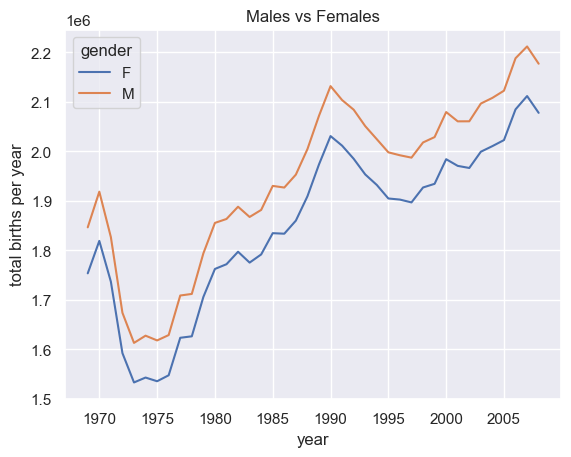

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');
plt.title("Males vs Females")



In [304]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [300]:
births["day"].unique


<bound method Series.unique of 0        1.0
1        1.0
2        2.0
3        2.0
4        3.0
        ... 
15542    NaN
15543    NaN
15544    NaN
15545    NaN
15546    NaN
Name: day, Length: 15547, dtype: float64>

In [313]:
births.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [314]:
print(births.year.unique())
print(births.month.unique())
print(births.day.unique())

[1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99. nan]


In [325]:
births['day'].replace('nan', 1, inplace= True)
births['day'].replace(99, 1, inplace= True)
print(births.day.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31  0]


In [359]:
births['day'] = births['day'].astype(int)
births['month'] = births['month'].astype(int)

In [340]:
births.index = pd.to_datetime(10000 * births.year +100 * births.month +births.day, format='%Y%m%d',
 errors = "coerce")
births['dayofweek'] = births.index.dayofweek

C:\Users\HP Demo\AppData\Local\Temp\ipykernel_272\1325335436.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


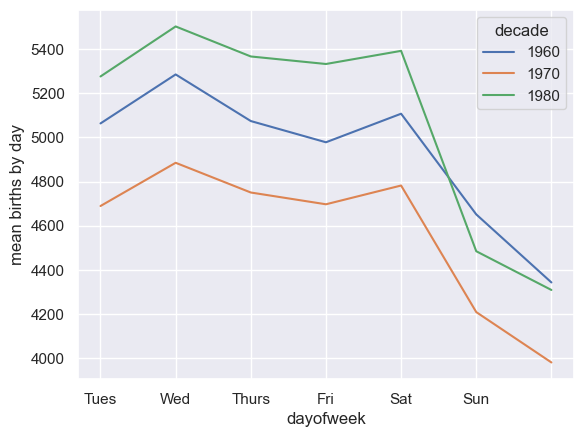

In [341]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [360]:
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.head()

births
1.0 1.0  4009.225
    2.0  4247.400
    3.0  4500.900
    4.0  4571.350
    5.0  4603.625

In [371]:
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
births_by_date.head()

C:\Users\HP Demo\AppData\Local\Temp\ipykernel_272\1177792690.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


TypeError: 'float' object cannot be interpreted as an integer

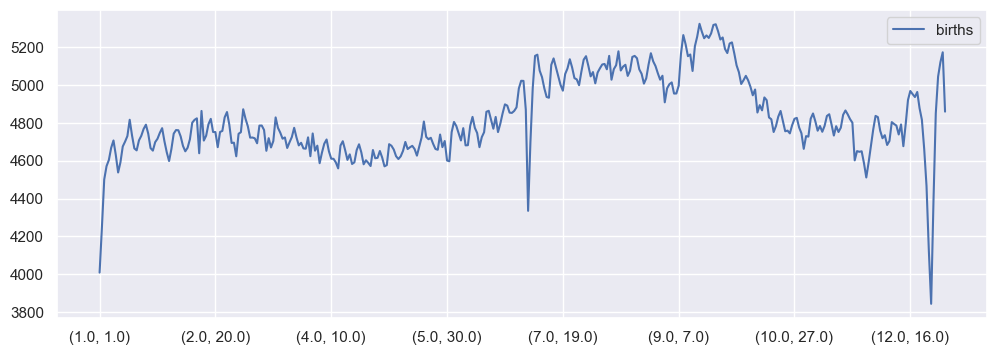

In [372]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [374]:
df = pd.read_csv("https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv")

In [375]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
df["Date"]= pd.to_datetime (df["Date"])

In [376]:
df.loc[0, "Date"].day_name()

AttributeError: 'str' object has no attribute 'day_name'